### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [60]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [61]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [62]:
initial_data.shape[0] == processed_data.shape[0]

True

In [63]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [64]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [65]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [66]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

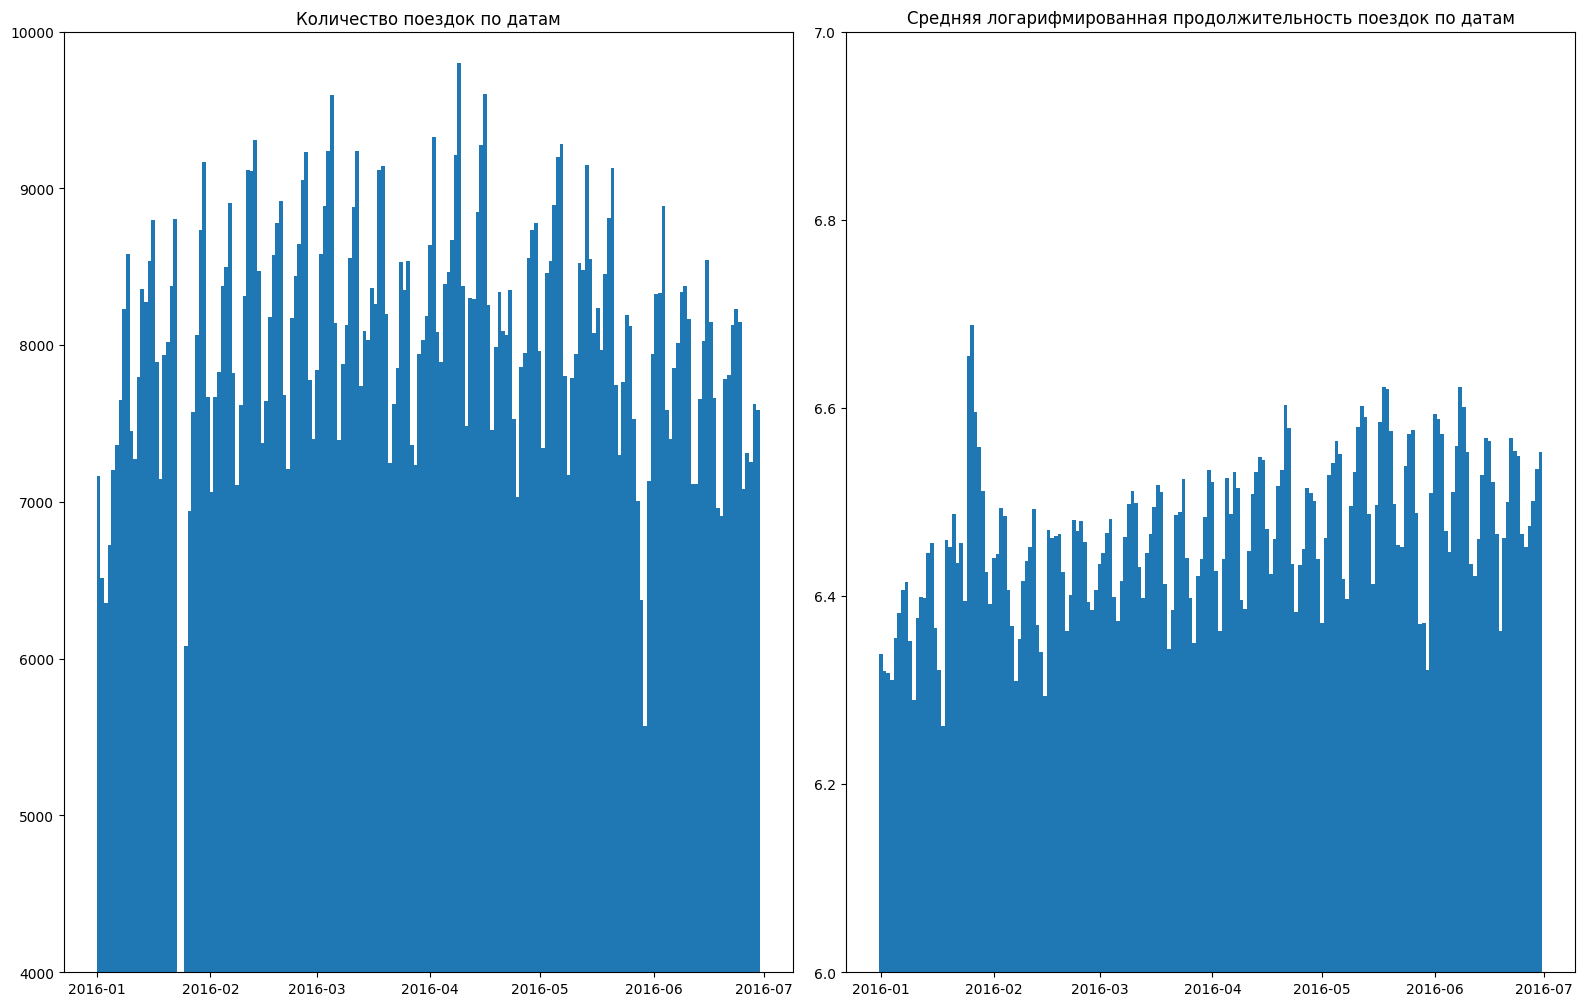

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


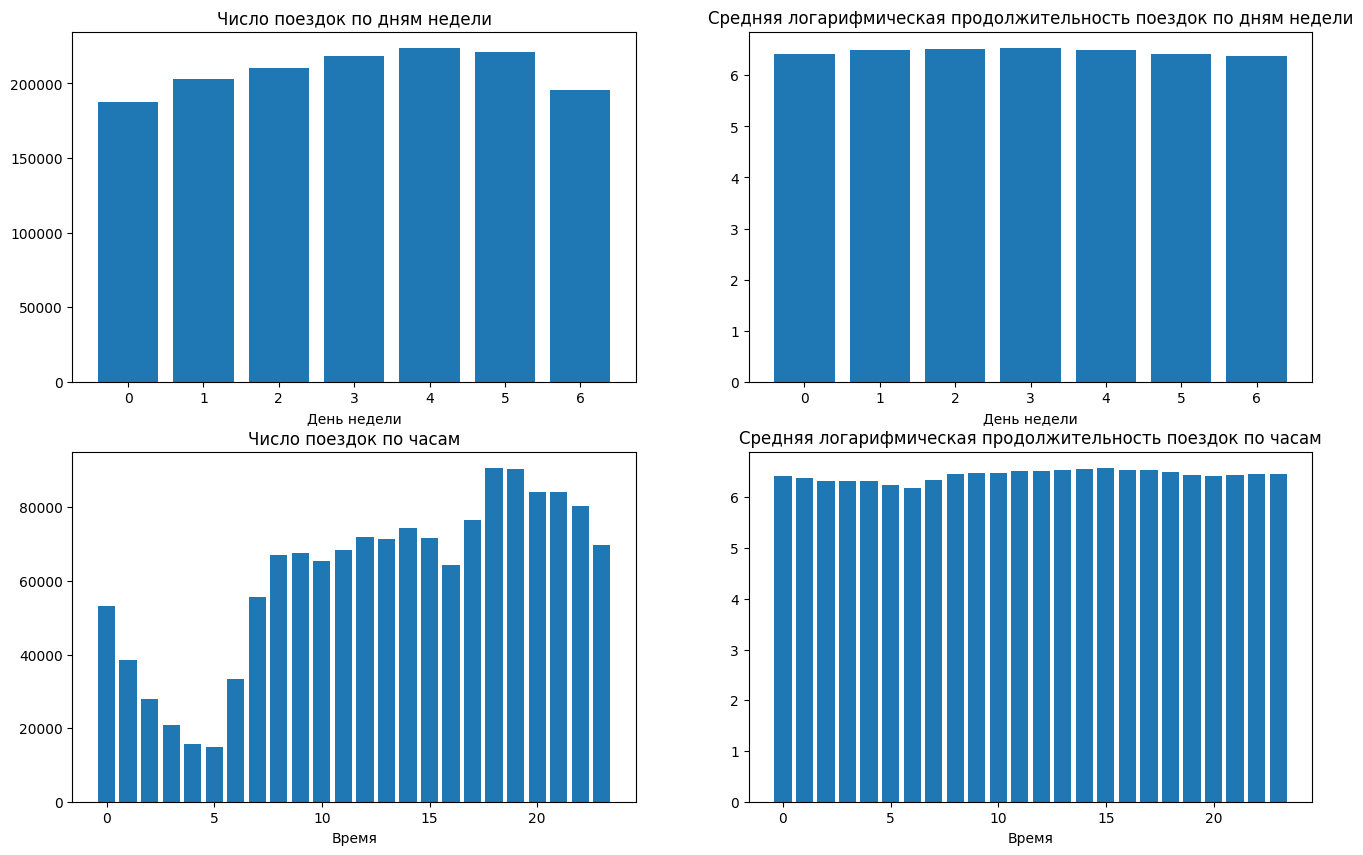

In [68]:
### Your code is here
count_week = processed_data.groupby('day_of_week')['date'].count()
mean_week = processed_data.groupby('day_of_week')['log_trip_duration'].mean()

fig = plt.figure()
fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(2, 2, 1)
plt.bar(count_week.index, count_week)
plt.title('Число поездок по дням недели')
plt.xlabel('День недели')

ax_2 = fig.add_subplot(2, 2, 2)
plt.bar(mean_week.index, mean_week)
plt.title('Средняя логарифмическая продолжительность поездок по дням недели')
plt.xlabel('День недели')

count_hour = processed_data.groupby('hour')['date'].count()
mean_hour = processed_data.groupby('hour')['log_trip_duration'].mean()

ax_3 = fig.add_subplot(2, 2, 3)
plt.bar(count_hour.index, count_hour)
plt.title('Число поездок по часам')
plt.xlabel('Время')

ax_4 = fig.add_subplot(2, 2, 4)
plt.bar(mean_hour.index, mean_hour)
plt.title('Средняя логарифмическая продолжительность поездок по часам')
plt.xlabel('Время')

plt.show()

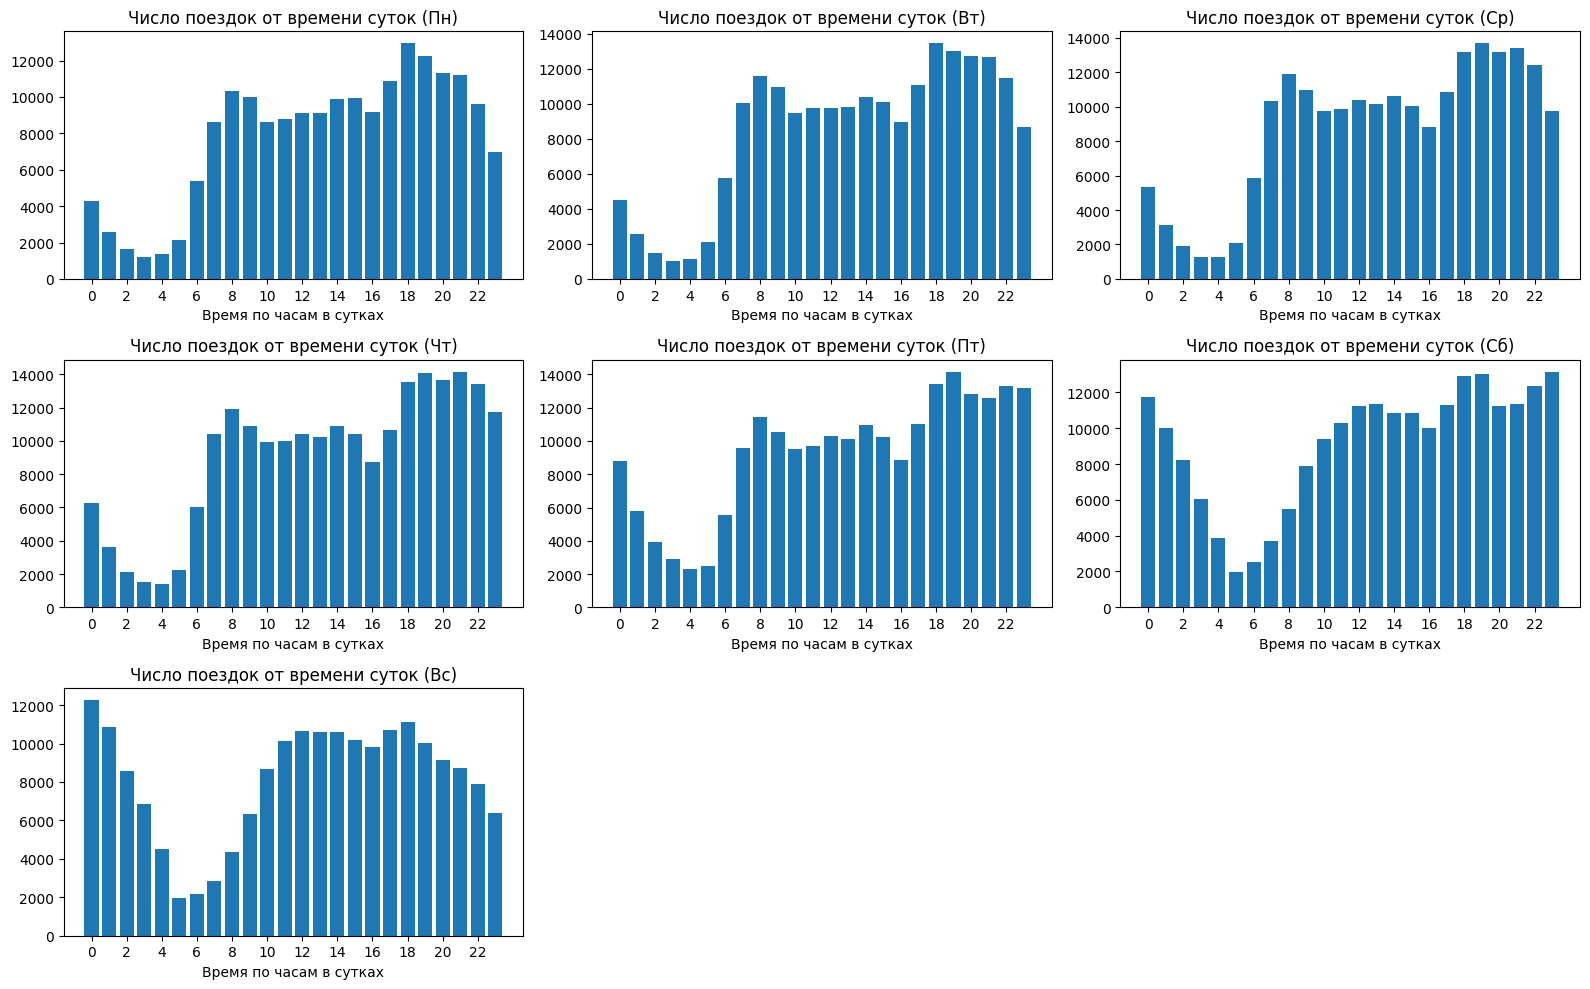

In [69]:
# Средняя продолжительность поездки vs время суток для каждого дня недели

count_day_hour = processed_data.groupby(['day_of_week', 'hour'])['log_trip_duration'].count()

fig = plt.figure()
fig.set_size_inches(16, 10)

titles = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

for i in range(0, 7):
    ax = fig.add_subplot(3, 3, i+1)
    plt.bar(np.arange(0, 24), count_day_hour[i])
    plt.xlabel('Время по часам в сутках')
    plt.title(f'Число поездок от времени суток ({titles[i]})')
    plt.xticks(np.arange(0, 24, 2))

fig.tight_layout()
plt.show()

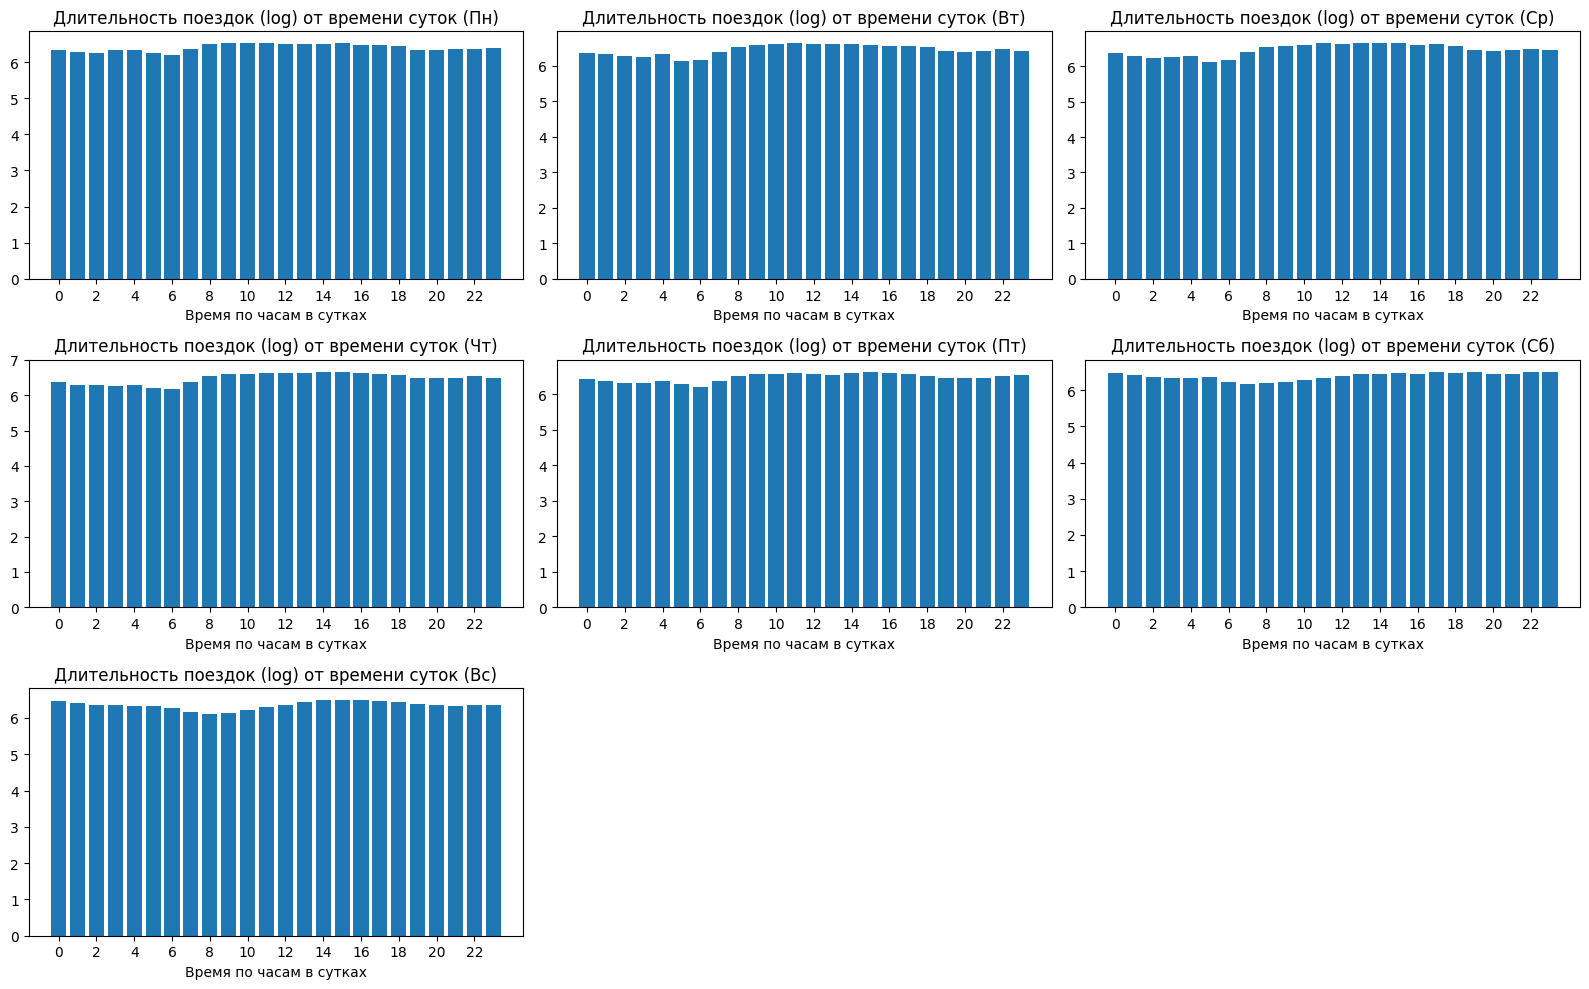

In [70]:
mean_day_hour = processed_data.groupby(['day_of_week', 'hour'])['log_trip_duration'].mean()

fig = plt.figure()
fig.set_size_inches(16, 10)

titles = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

for i in range(0, 7):
    ax = fig.add_subplot(3, 3, i+1)
    plt.bar(np.arange(0, 24), mean_day_hour[i])
    plt.xlabel('Время по часам в сутках')
    plt.title(f'Длительность поездок (log) от времени суток ({titles[i]})')
    plt.xticks(np.arange(0, 24, 2))

fig.tight_layout()
plt.show()

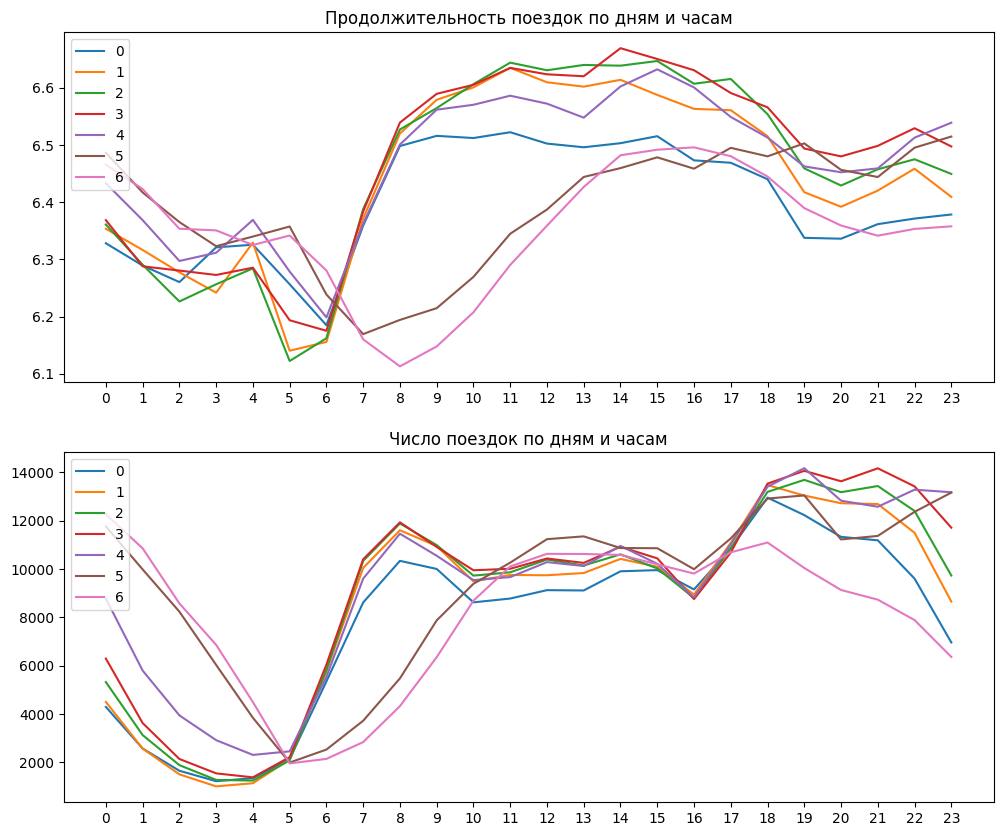

In [71]:
day_hour_duration = processed_data.groupby(['day_of_week', 'hour'])['log_trip_duration'].mean().reset_index()
day_hour_count = processed_data.groupby(['day_of_week', 'hour'])['log_trip_duration'].count().reset_index()

fig = plt.figure()
fig.set_size_inches(12, 10)

ax_1 = fig.add_subplot(2, 1, 1)
for day in day_hour_duration['day_of_week'].unique():
    plt.plot('hour', 'log_trip_duration', data=day_hour_duration.query('day_of_week == @day'), label=day)
plt.legend(loc='upper left')
plt.xticks(day_hour_duration['hour'].unique())
plt.title('Продолжительность поездок по дням и часам')

ax_2 = fig.add_subplot(2, 1, 2)
for day in day_hour_count['day_of_week'].unique():
    plt.plot('hour', 'log_trip_duration', data=day_hour_count.query('day_of_week == @day'), label=day)
plt.legend(loc='upper left')
plt.xticks(day_hour_count['hour'].unique())
plt.title('Число поездок по дням и часам')

plt.show()



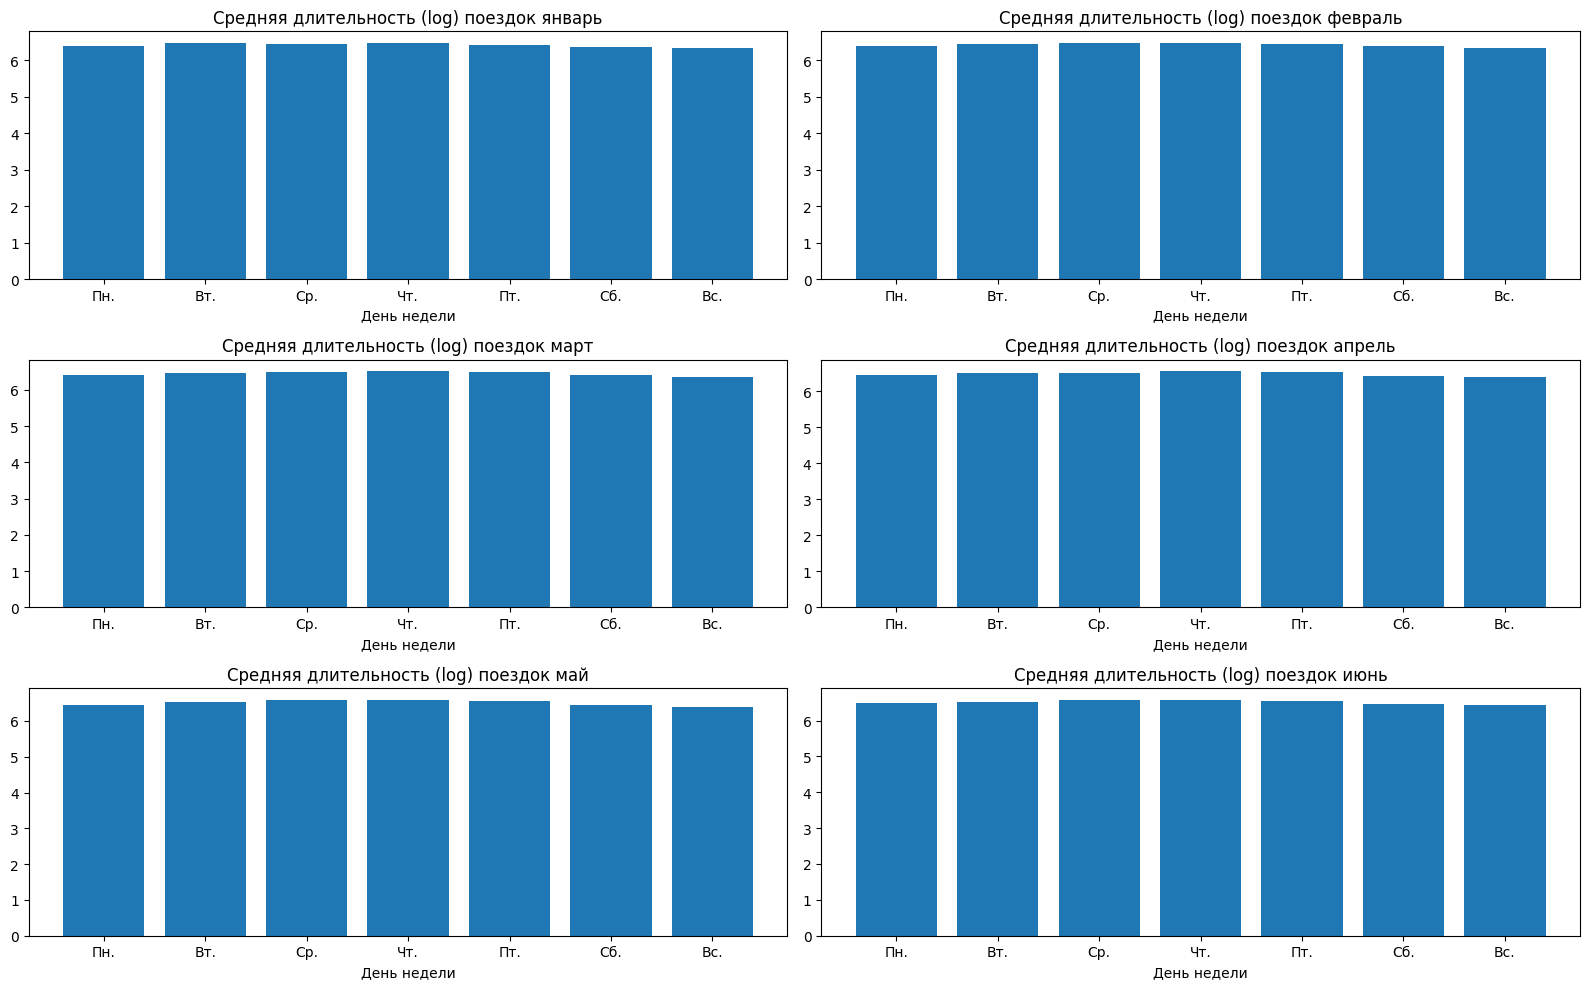

In [72]:
month_day_duration = processed_data.groupby(['month', 'day_of_week'])['log_trip_duration'].mean()

titles = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь']

fig = plt.figure()
fig.set_size_inches(16, 10)

for i in range(0, 6):
    ax = fig.add_subplot(3, 2, i+1)
    plt.bar(['Пн.', 'Вт.', 'Ср.', 'Чт.', 'Пт.', 'Сб.', 'Вс.'], month_day_duration[i+1])
    plt.xlabel('День недели')
    plt.title(f'Средняя длительность (log) поездок {titles[i]}')

fig.tight_layout()
plt.show()

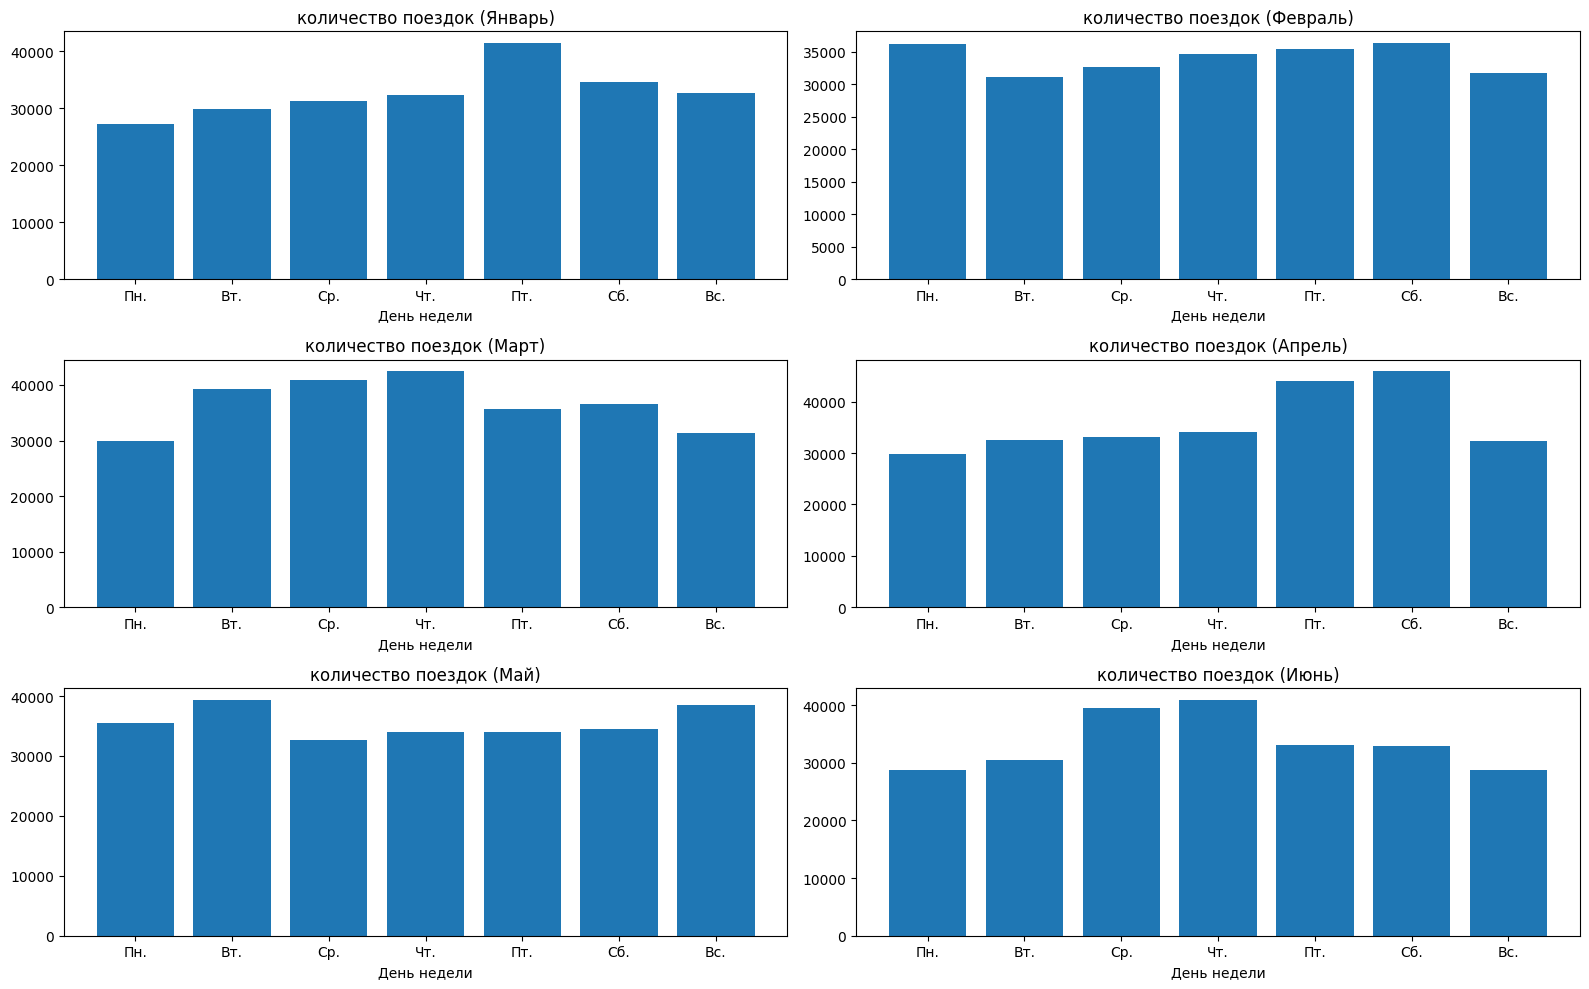

In [73]:
month_day_count = processed_data.groupby(['month', 'day_of_week'])['log_trip_duration'].count()

titles = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь']

fig = plt.figure()
fig.set_size_inches(16, 10)

for i in range(0, 6):
    ax = fig.add_subplot(3, 2, i+1)
    plt.bar(['Пн.', 'Вт.', 'Ср.', 'Чт.', 'Пт.', 'Сб.', 'Вс.'], month_day_count[i + 1])
    plt.xlabel('День недели')
    plt.title(f'количество поездок ({titles[i]})')
    
fig.tight_layout()
plt.show()


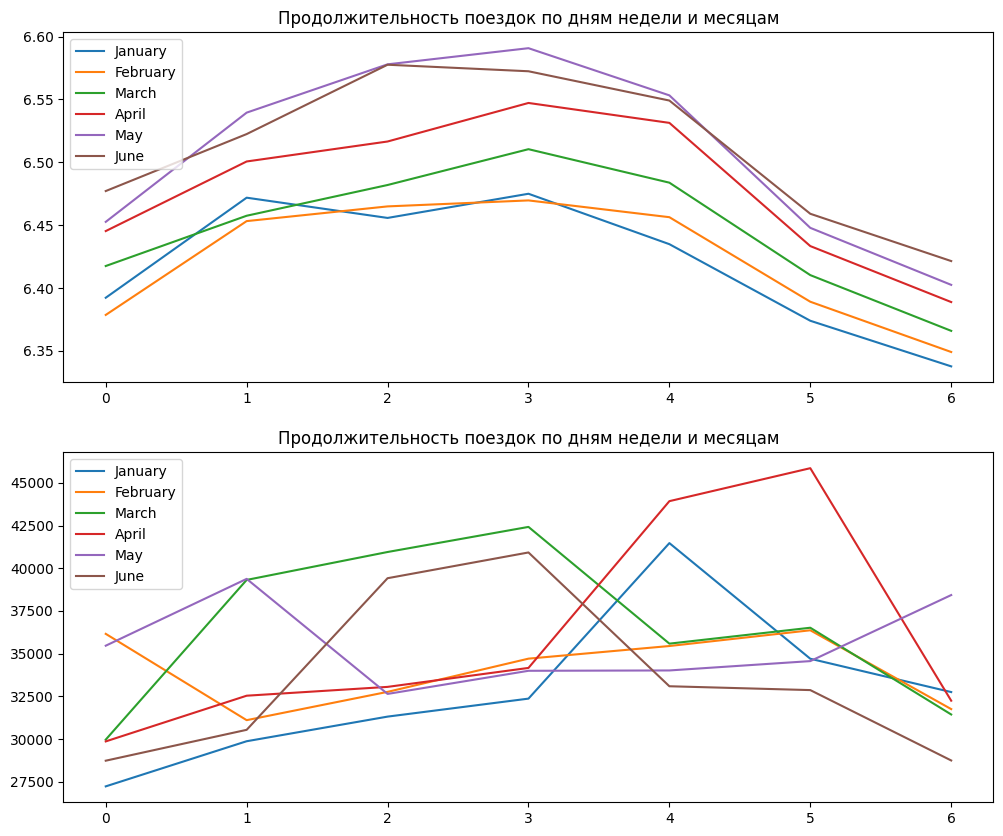

In [74]:

day_month_duration = processed_data.groupby(['month', 'day_of_week'])['log_trip_duration'].mean().reset_index()
day_month_count = processed_data.groupby(['month', 'day_of_week'])['log_trip_duration'].count().reset_index()

months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'}

day_month_duration['month'] = day_month_duration['month'].map(months)
day_month_count['month'] = day_month_count['month'].map(months)

fig = plt.figure()
fig.set_size_inches(12, 10)

ax_1 = fig.add_subplot(2, 1, 1)
for month in day_month_duration['month'].unique():
    plt.plot('day_of_week', 'log_trip_duration', data=day_month_duration.query('month == @month'), label=month)
plt.legend(loc='upper left')
plt.xticks(day_month_duration['day_of_week'].unique())
plt.title('Продолжительность поездок по дням недели и месяцам')

ax_2 = fig.add_subplot(2, 1, 2)
for month in day_month_count['month'].unique():
    plt.plot('day_of_week', 'log_trip_duration', data=day_month_count.query('month == @month'), label=month)
plt.legend(loc='upper left')
plt.xticks(day_month_count['day_of_week'].unique())
plt.title('Продолжительность поездок по дням недели и месяцам')

plt.show()



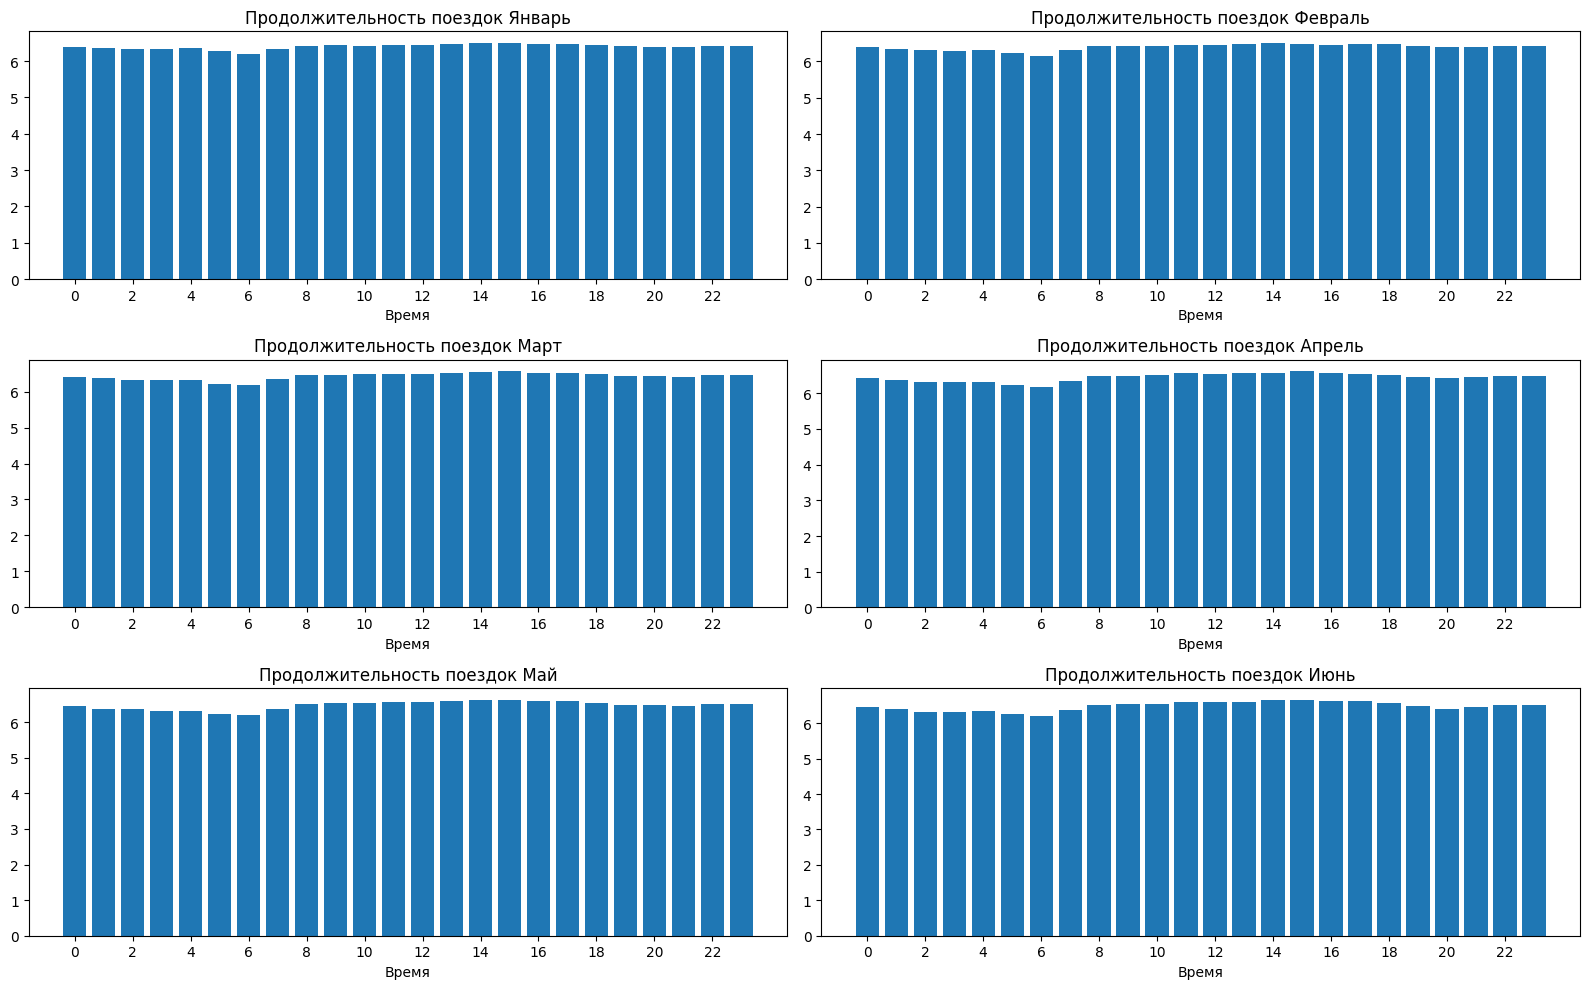

In [75]:
month_hour_duration = processed_data.groupby(['month', 'hour'])['log_trip_duration'].mean()

months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь']

fig = plt.figure()
fig.set_size_inches(16, 10)

for i in range(0, 6):
    ax = fig.add_subplot(3, 2, i+1)
    plt.bar(np.arange(0, 24), month_hour_duration[i+1])
    plt.xlabel('Время')
    plt.title(f'Продолжительность поездок {months[i]}')
    plt.xticks(np.arange(0, 24, 2))

plt.tight_layout()
plt.show()

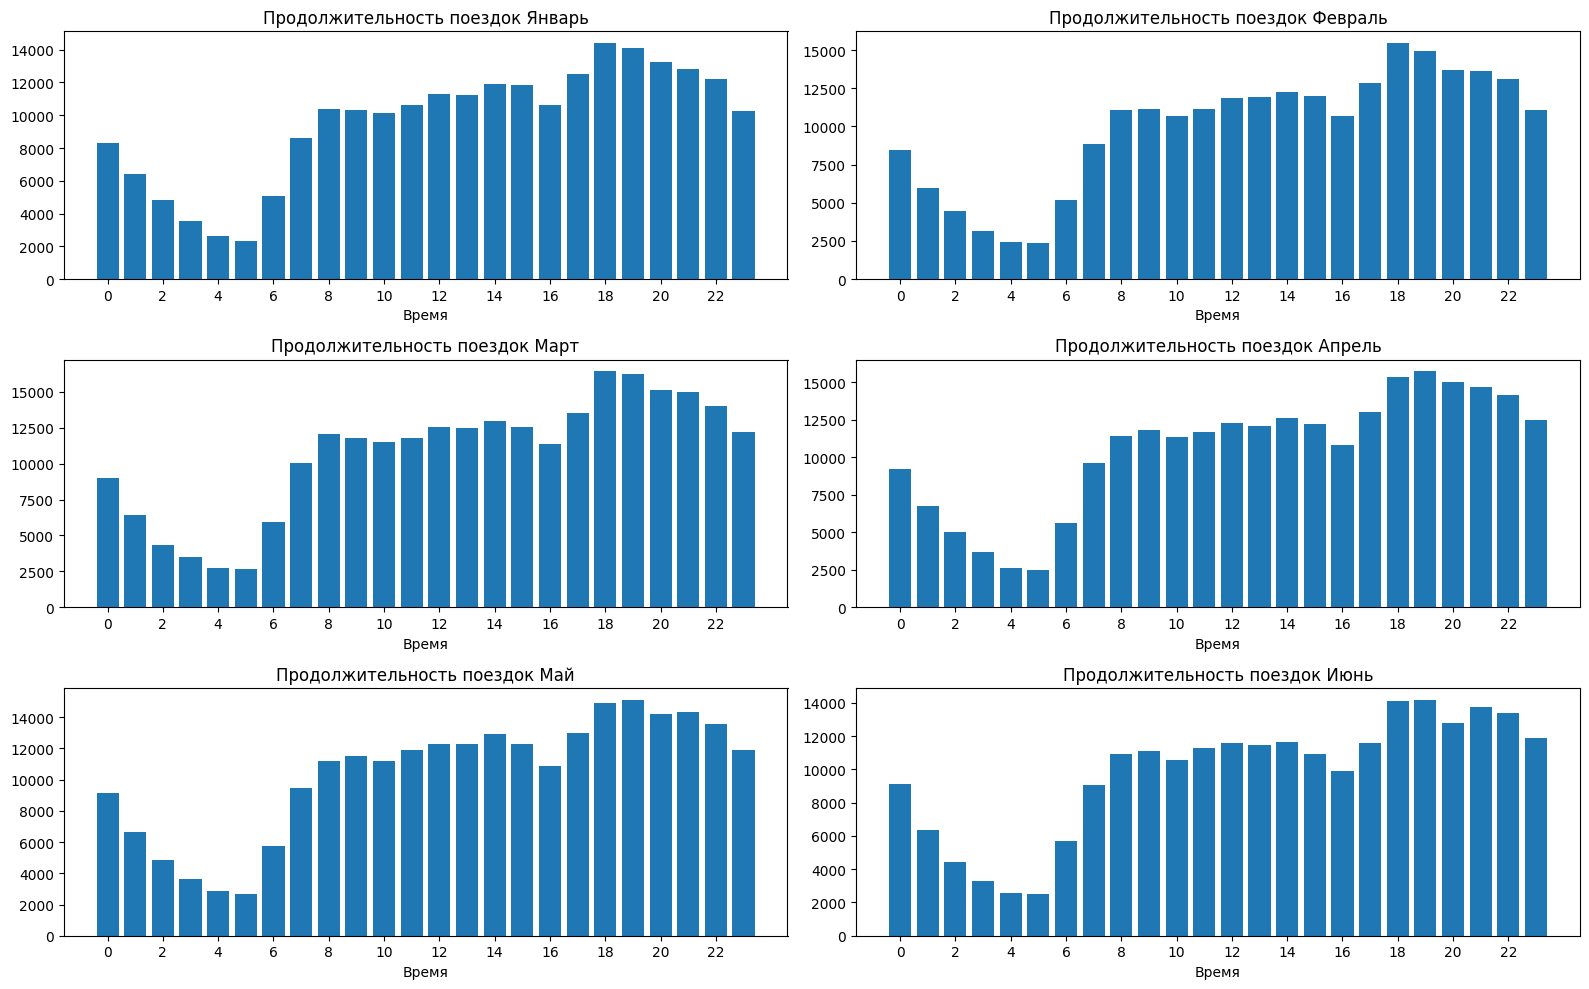

In [76]:
month_hour_count = processed_data.groupby(['month', 'hour'])['log_trip_duration'].count()

months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь']

fig = plt.figure()
fig.set_size_inches(16, 10)

for i in range(0, 6):
    ax = fig.add_subplot(3, 2, i+1)
    plt.bar(np.arange(0, 24), month_hour_count[i+1])
    plt.xlabel('Время')
    plt.title(f'Продолжительность поездок {months[i]}')
    plt.xticks(np.arange(0, 24, 2))

plt.tight_layout()
plt.show()

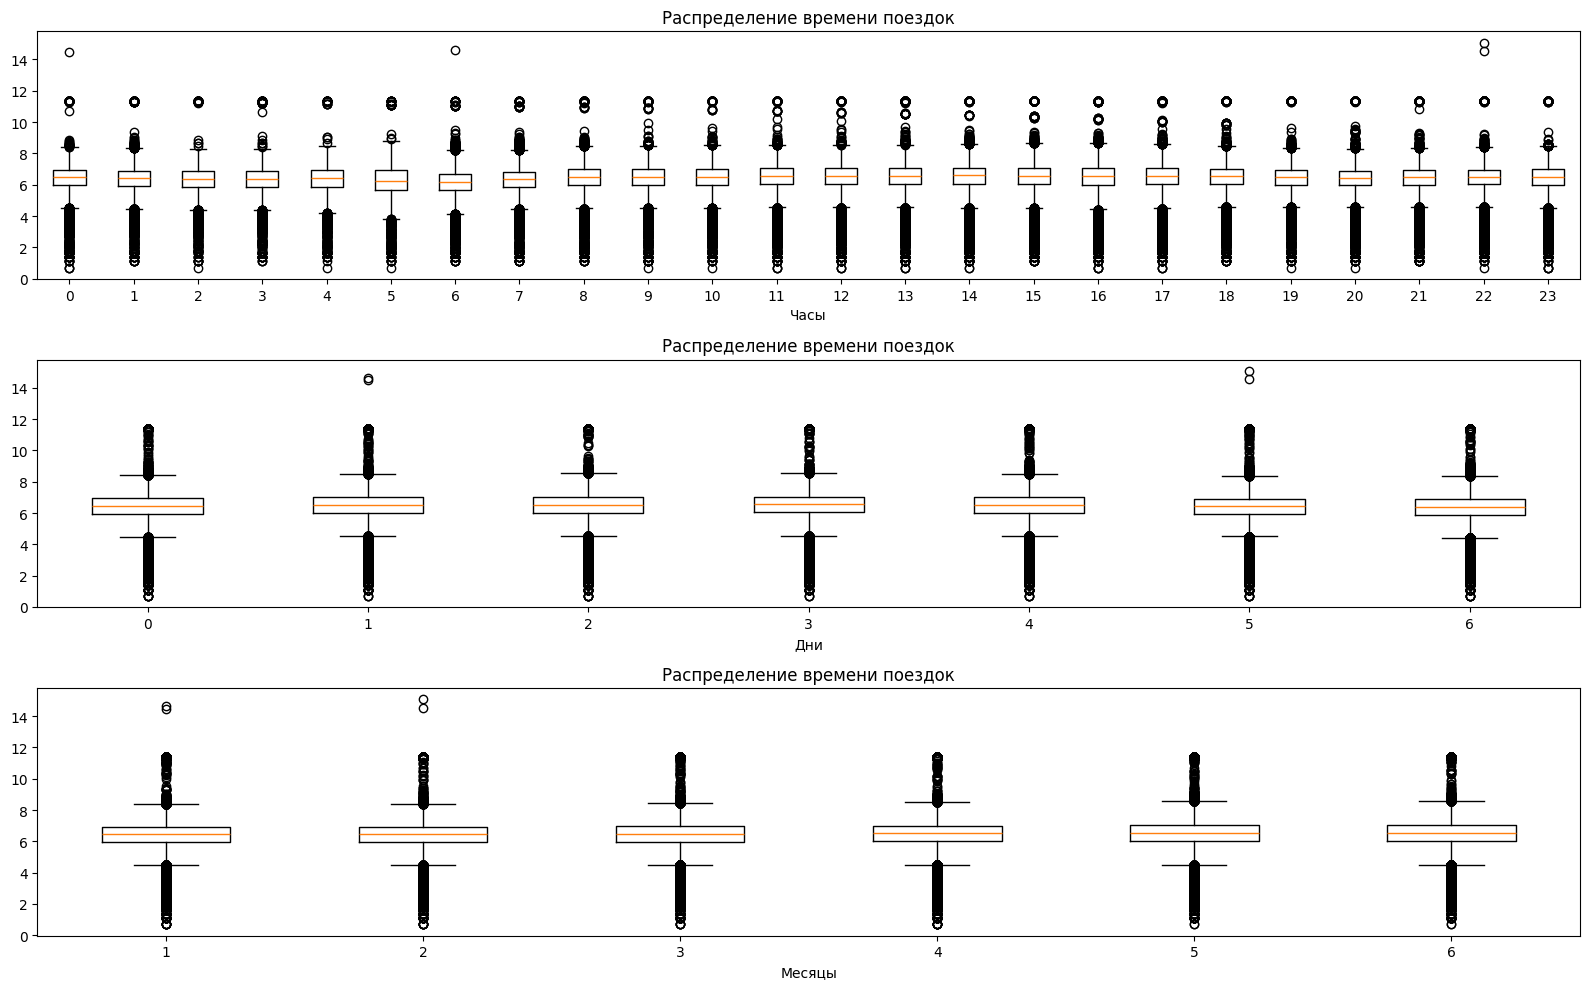

In [77]:
hour_dict ={}
day_dict = {}
month_dict ={}

for hour in sorted(processed_data['hour'].unique()):
    hour_dict[hour] = processed_data['log_trip_duration'][processed_data['hour'] == hour]

for day in sorted(processed_data['day_of_week'].unique()):
    day_dict[day] = processed_data['log_trip_duration'][processed_data['day_of_week'] == day]

for month in sorted(processed_data['month'].unique()):
    month_dict[month] = processed_data['log_trip_duration'][processed_data['month'] == month]

dicts = [hour_dict, day_dict, month_dict]
lables = ['Часы', 'Дни', 'Месяцы']

fig = plt.figure()
fig.set_size_inches(16, 10)

for i in range(3):
    ax = fig.add_subplot(3, 1, i+1)
    plt.boxplot(dicts[i].values(), tick_labels=dicts[i].keys())
    plt.title('Распределение времени поездок')
    plt.xlabel(lables[i])

plt.tight_layout()
plt.show()



Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [78]:
### Создадим первый бинарный признак
### Your code is here
processed_data['anomaly'] = [1 if (date.day == 23 and date.month == 1) else 0 for date in processed_data['date']]

In [79]:
### Создадим второй бинарный признак
### Your code is here
long_trip = processed_data.groupby(['day_of_week', 'hour'])['log_trip_duration'].mean().sort_values(ascending=False).head(10).index
processed_data['traffic_jam'] = [1 if (x[0], x[1]) in long_trip else 0 for x in processed_data.loc[:, ['day_of_week', 'hour']].values]

In [80]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [81]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [82]:
### Делаем OneHotEncoding и конкатим с processed_data


for col in ['day_of_week', 'hour', 'month']:
    enc_table = pd.get_dummies(processed_data[col], drop_first=True, prefix=col)
    enc_table.replace({False: 0, True: 1}, inplace=True)
    ### Your code is here
    processed_data = pd.concat((processed_data, enc_table), axis=1)
    processed_data = processed_data.drop(col, axis=1)

C:\Users\cronr\AppData\Local\Temp\ipykernel_14124\4267184550.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  enc_table.replace({False: 0, True: 1}, inplace=True)
C:\Users\cronr\AppData\Local\Temp\ipykernel_14124\4267184550.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  enc_table.replace({False: 0, True: 1}, inplace=True)
C:\Users\cronr\AppData\Local\Temp\ipykernel_14124\4267184550.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, expli

In [83]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [84]:
processed_data.shape[1]

41

In [85]:
processed_data.head(5).to_csv('output.csv', sep=',', index=True)

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [86]:
### Your code is here
corr_data = processed_data[['distance_km', 'passenger_count']].corr()


In [87]:
round(corr_data, 3)

,distance_km,passenger_count
distance_km,1.000,0.017
passenger_count,0.017,1.000


In [88]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [89]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
X_train = processed_data.drop(['log_trip_duration'], axis=1)
Y_train = processed_data['log_trip_duration']
sfs.fit(X_train, Y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [90]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
new_features = sfs.get_feature_names_out()
new_features

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [91]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here
from sklearn.metrics import mean_squared_error

X_train_new = X_train[new_features]

model.fit(X_train_new, Y_train)
predict_values = model.predict(X_train_new)

print(f'MSE is: {mean_squared_error(Y_train, predict_values)}')


MSE is: 0.4154000234078256
